In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [35]:
class grad_descent:

    def __init__(self, init_a=0, init_b=0):
        self.init_a = init_a
        self.init_b = init_b
        
        
    def predict(self, x):
        
        y_pred = self.curr_a*x + self.curr_b
    
        return y_pred
            
        
    def fit(self, x, y, alpha=0.01, max_iters=1000, tolerance=0.001):
        
        self.curr_a = self.init_a
        self.curr_b = self.init_b
        
        cost = 0
        self.logs = {"iter": [], "a": [], "b":[], "cost": [], "diff_a": [], "diff_b": []}
    
        for i in range(max_iters):

            prev_a = self.curr_a
            prev_b = self.curr_b
        
            y_pred = self.predict(x)
        
            m = len(x)

            ad = -(2/m)*sum(x*(y-y_pred))
            bd = -(2/m)*sum(y-y_pred)

            self.curr_a = self.curr_a - alpha * ad   
            self.curr_b = self.curr_b - alpha * bd

            cost = (1/m)*sum((y-y_pred)**2)

            self.logs["iter"].append(i)
            self.logs["b"].append(self.curr_a)
            self.logs["a"].append(self.curr_b)
            self.logs["cost"].append(cost)
            self.logs["diff_a"].append(self.curr_a - prev_a)
            self.logs["diff_b"].append(self.curr_b - prev_b)

            if abs(self.curr_a - prev_a) < tolerance and abs(self.curr_b - prev_b) < tolerance:
                print("local minimum:", self.curr_a, self.curr_b)
                break

        return self

In [46]:
def plot_results(logs, x, y, y_pred):

    plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    plt.plot(logs["iter"],logs["a"])
    plt.xlabel("iteration")
    plt.ylabel("a")
    
    plt.subplot(2,2,2)
    plt.plot(logs["iter"],logs["b"])
    plt.xlabel("iteration")
    plt.ylabel("b")

    plt.subplot(2,2,3)
    plt.plot(logs["iter"],logs["cost"])
    plt.yscale("log")
    plt.xlabel("iteration")
    plt.ylabel("log cost")

    plt.subplot(2,2,4)
    plt.plot(x, y_pred)
    plt.xlabel("x")
    plt.ylabel("y pred")
    plt.scatter(x, y)

In [16]:
grad_descent.predict

<function __main__.grad_descent.predict(self, x)>

In [36]:
x = np.array([1,2,4,4,5])
y = np.array([5,7,8,11,13])

classifier = grad_descent()
classifier.fit(x,y).predict(x)
# classifier.predict(x)

local minimum: 1.8574589406152995 2.806409876339371


array([ 4.66386882,  6.52132776, 10.23624564, 10.23624564, 12.09370458])

In [ ]:
classifier.logs["iter"]

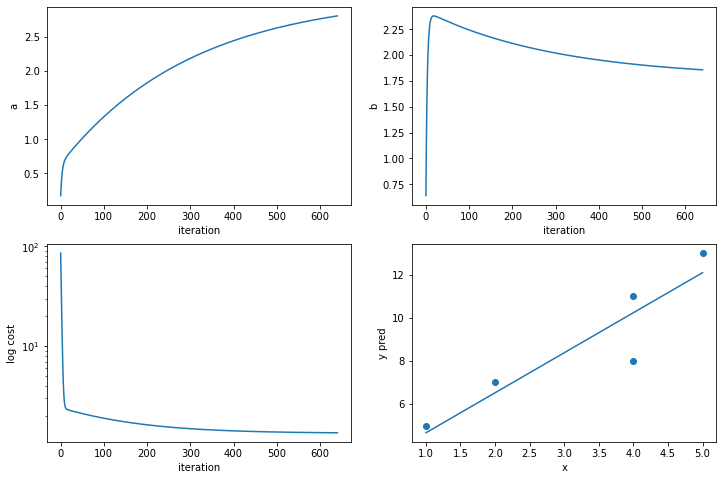

In [47]:
y_pred = classifier.predict(x)
logs = classifier.logs

plot_results(logs, x, y, y_pred)